# **Scraping from forecast weather**

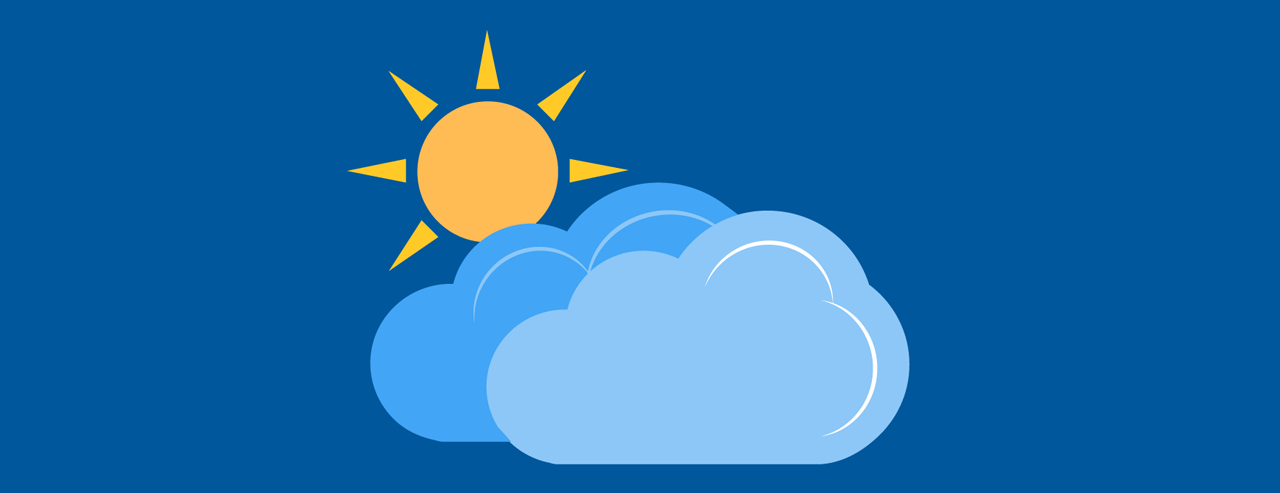

In [1]:
import csv 
from bs4 import BeautifulSoup
from itertools import zip_longest
import requests
import pandas as pd

In [2]:
src = requests.get("https://www.timeanddate.com/weather/egypt/alexandria/ext")
soup=BeautifulSoup(src.text,"html.parser")

In [3]:
weathers = soup.find("table",{"id":"wt-ext"}).find("tbody").find_all("tr")

In [4]:
days=[]
temps=[]
cases=[]
winds=[]

data=[]
for weather in weathers:
  day = weather.find("th").text
  temp= weather.find_all("td")[1].text.split()
  temp_text = ' '.join([str(elem) for elem in temp])
  case=weather.find_all("td")[2].text
  wind=weather.find_all("td")[4].text
  
  days.append(day)
  temps.append(temp_text)
  cases.append(case)
  winds.append(wind)
  data.append([day,temp_text,case,wind])

weather_data = pd.DataFrame(data, columns=["Date","Temperature","Weather","Wind Speed"])

Weather_data_full = pd.DataFrame(
    {'Date': days,
     'Temperature': temps,
     'Weather': cases,
     'Wind Speed':winds
    })  

In [5]:
with open("weather_temper.csv","w") as fid:
  wr=csv.writer(fid)
  wr.writerow(["Date","Temperature","Weather","Wind Speed"])
  wr.writerows(data)

In [6]:
Weather_data_full

,Date,Temperature,Weather,Wind Speed
0,Tue25 Oct,25 / 18 °C,Sunny.,15 km/h
1,Wed26 Oct,27 / 22 °C,Sunny.,17 km/h
2,Thu27 Oct,27 / 22 °C,Sunny.,15 km/h
3,Fri28 Oct,26 / 21 °C,Sunny.,14 km/h
4,Sat29 Oct,26 / 20 °C,Sunny.,14 km/h
5,Sun30 Oct,25 / 20 °C,Sunny.,15 km/h
6,Mon31 Oct,24 / 21 °C,Sunny.,15 km/h
7,Tue1 Nov,23 / 20 °C,Sunny.,18 km/h
8,Wed2 Nov,22 / 19 °C,Sunny.,16 km/h
9,Thu3 Nov,23 / 19 °C,Showers late. Afternoon clouds.,20 km/h
